### Curse of dimensionality

Square, qube, hypercube --> ... -->

- Place two points randomly in all dimensions.\
In which dimensions will the points be closest?

-> The more dimensions, the greater the likelihood that these two points are further apart. \
This may result in a new data point being far away from the training data.


Lösning #1
- Skaffa mer data!
    - Dyrt

Lösning #2
- Dimensionsreducera
    - Linjärkombination av flera features för att skapa färre features

## PCA

Principal component analysis
- Lågdimensionell representation av datasetet

-> Linear combination of feature variabales with max variance

Färre antal dimensioner, men nya variabler ska kunna förklara så mycket som möjligt från originaldatan (hög varians)

1st PC (Principal Component)

$Z_1 = \phi_{11}, x_1 + \phi_{21}, x_2 + ... \phi_{p1}, x_p$

$x$ data

Phi $\phi$ are loadings (matrix of feature vectors)


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

X, y = load_breast_cancer().data, load_breast_cancer().target
df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [9]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

pca = PCA(n_components=X_train.shape[1])

pca_transformation = pca.fit_transform(scaled_X_train)

pca_transformation.shape

(381, 30)

In [10]:
pca.explained_variance_ratio_

array([4.32034362e-01, 1.98534750e-01, 9.80816513e-02, 6.50031120e-02,
       5.15098214e-02, 4.20420694e-02, 2.26471250e-02, 1.69757997e-02,
       1.29754455e-02, 1.21150953e-02, 1.04047339e-02, 8.82553474e-03,
       8.05898859e-03, 5.11718469e-03, 2.79727033e-03, 2.26321052e-03,
       1.97300147e-03, 1.78954632e-03, 1.66253597e-03, 1.05243069e-03,
       9.08690423e-04, 8.84491302e-04, 7.45627005e-04, 5.61952738e-04,
       4.98462201e-04, 2.39315567e-04, 2.19303624e-04, 4.93040172e-05,
       2.53610171e-05, 3.82323987e-06])

In [13]:
proportion_variance_explained = np.cumsum(pca.explained_variance_ratio_)

proportion_variance_explained

array([0.43203436, 0.63056911, 0.72865076, 0.79365388, 0.8451637 ,
       0.88720577, 0.90985289, 0.92682869, 0.93980414, 0.95191923,
       0.96232397, 0.9711495 , 0.97920849, 0.98432567, 0.98712294,
       0.98938615, 0.99135916, 0.9931487 , 0.99481124, 0.99586367,
       0.99677236, 0.99765685, 0.99840248, 0.99896443, 0.99946289,
       0.99970221, 0.99992151, 0.99997082, 0.99999618, 1.        ])

[Text(0.5, 1.0, 'Knee plot for PVE'),
 Text(0.5, 0, 'N of PCs used'),
 Text(0, 0.5, 'PVE')]

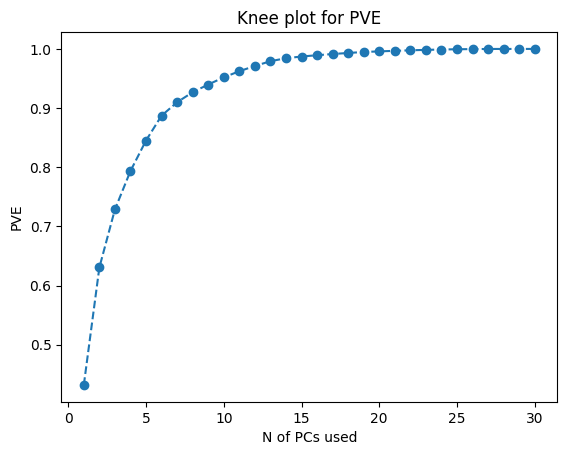

In [19]:
ax = plt.axes()

ax.plot(range(1,31), proportion_variance_explained, '--o')
ax.set(title = "Knee plot for PVE", xlabel="N of PCs used", ylabel="PVE")